# Extract-Transform-Load With Census.Gov Data

**Joseph Martinez**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The process of performing Extract-Transform-Load (ETL) is vital. Data has a story to tell and sometimes performing basic movements on excel won't always cut it. It takes more than just moving tables around in excel. ETL is a process where data can be formed from its raw format and converted into a readable display, like using Python to talk to MySQL. When you perform the ETL on raw data, the storytelling that data does is tremendous. With this MTRS data, we are able to see trendlines, percentage changes and rolling averages on any data present in the table with lightning adjustments and no constraints like in excel.


[Back to top](#Index)


## 1. Introduction

In this project, we will be using the MTRS data provided by the Census Bureau. This data contains the last two decades of data pertaining to Retail and Food Services Sales. This data will be downloaded raw from the website where we will examine the data first hand to decide what is important and not important from the first observation. After that, we will perform a ETL using **Python** and **MySQL**. After establishing a link between the two, we will query from our command line to populate tables as well as visualizations. We will look at what sales have trended in the past two decades, what businesses suffered and strived during the COVID-19 pandemic and how to come to a conclusion on data when the straight forward approach does not cut it.

[Back to top](#Index)

## 2. Extract-Transform-Load

Extract-Transform-Load also known as ETL. In the most simple terms, ETL follows a specific flow chart for data. **Extract**, refers to taking data in its raw format. This can be taking data from a website where the raw data is currently in excel file format. **Transform** refers to taking that data and doing your first analysis on it. By looking at the raw data, you can decide at this point what information will be important, what data will transform over correctly and what data will need further cleaning. At this stage simple cleaning methods can be done, like taking out truncating information which will only cause issues when sending it to the client. At this point you will ensure to make sure you save the file in a readable version for your client. Finally, **Load**,  this is the section where you will import your readable data into your client of use for the database.

ETL is crucial to understand because it deals with the first steps to your data's foundation. Being able to find the data, begin a simple first clean and load it to your client is pivotal to becoming a data engineer. Without a grasp or understanding of these basic fundamentals can cause you to flood your database with endless bytes of useless data, most likely causing you to generate more space to be utilized due to large files.

[Back to top](#Index)

### 2.1 The ETL Process

Using the ETL process for our dataset will be simple with very minor interpretations. We will first look at the data in the raw format and decide what information we will keep. When doing this with our MRTS data we need to ensure we are not keeping information that will cause issues when we get to the Load section. So for starters we will remove data that doesn't fit in the flow table. This includes any information that is just one time mentioned in the excel. Once we clean up the data without having to do alot of digging at each column, we will then use excel shortcuts to convert all the information we want into one workbook to avoid having to code for each tab. This will let us be able to have a smooth transform transition when converting the data to a .csv file. Finally we will take our pre-edited scripts to create a read on our .csv file and convert that information into a working list. The other half of the script will be to create a database and table. The final part of that script will combine the two.

[Back to top](#Index)

### 2.2 Data Exploration

The MRTS dataset we are using is from the Census website. This information contains sales for a specific variety of bussinesses. The data contained in the set includes the business names, government code, year, sales for the month and the overall total sales for the year.

It includes adjusted sales values but we will discuss later on how and why we will decide to remove this information.

[Back to top](#Index)

### 2.3 Data Preparation

The first modification done was by discarding **title** as well as the **supplementary information** found at the bottom of each of the tables. This infomation varied depending on what year it was, where as some of that supplementary information was the same on other years. I took both the title as well as the supplementary information and made a separate excel to consolidate that information for later reference if I end up needing it. 

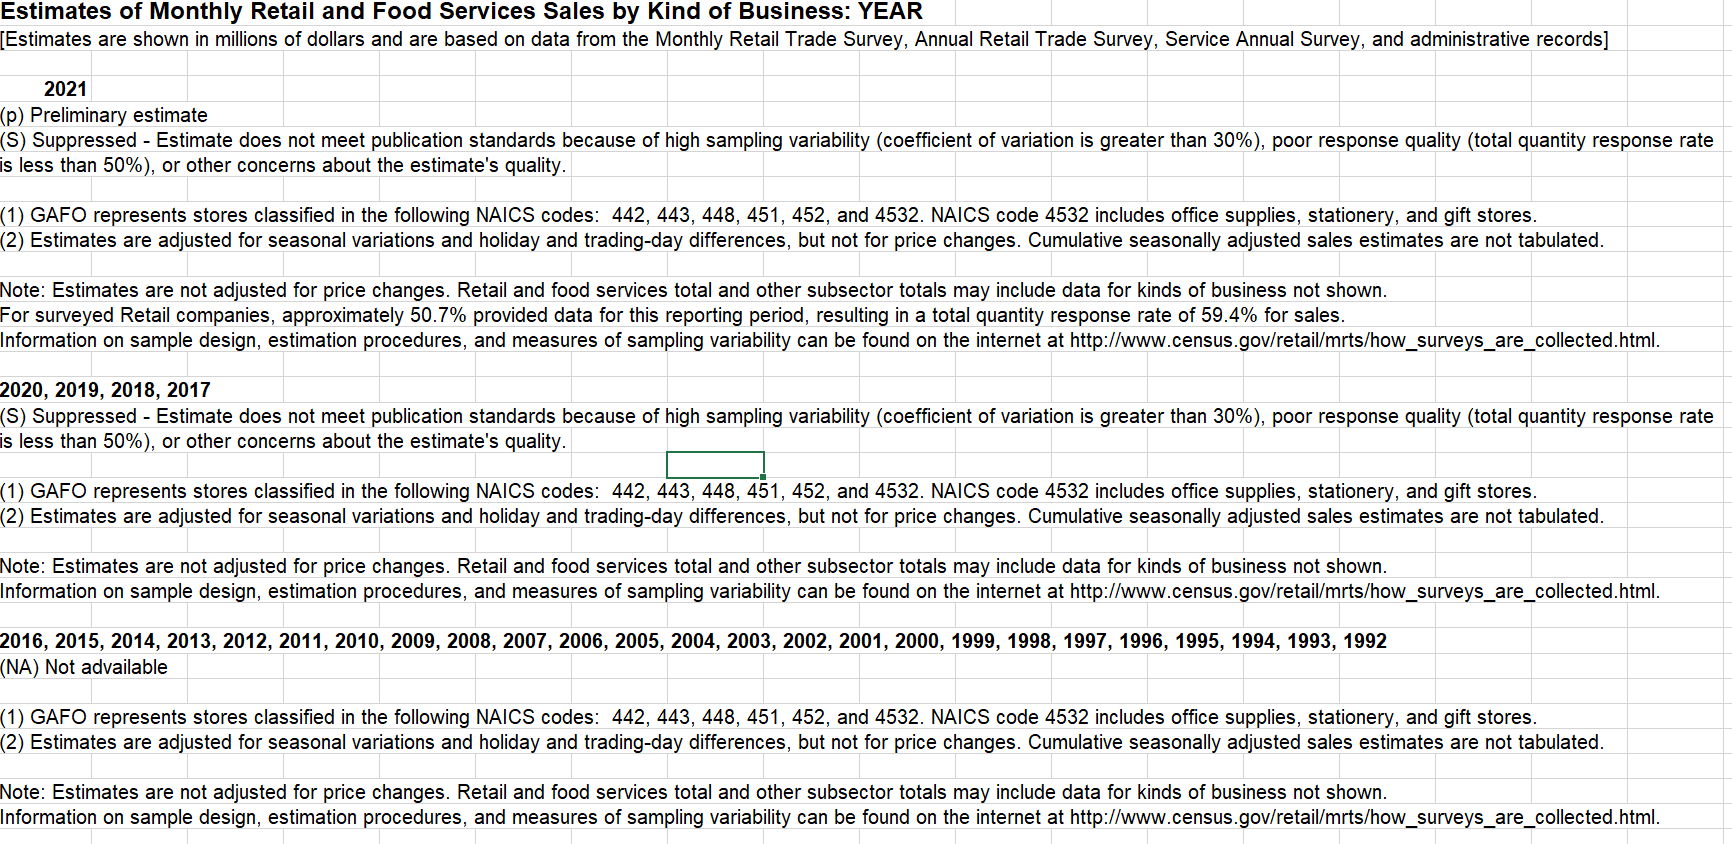

Another section of the table called **adjusted** was also deleted. These tables had an adjusted section for the following reason: "seasonal variation and holiday and trading-day differences, but not for price changes"(Census.gov). I also went ahead and made three separate columns, **Year**, **Month** and **Total**. This lets me combine all the data to one worksheet. The previous total columns were deleted (ex. 2021 had partial total data, so it was deleted) as I can query that data later in MySQL. The total columns I created are just the reference values for the specific year and month total that the business brought in (ex. New Car Dealers in year 2020 had a total revenue of 72,074 in January and 74,360 in Feburary, etc.).

Another section of data was ensured to be changed prior to moving forward was the string values in the total column. Values like *(S)* and *(NA)* were changed to 0. The reason it was 0 and not the average is because any total summations would skew the data in the wrong direction. The final version of Data was partially cleaned and saved as a .csv file from excel. The columns for the dataset would be the following: **id**, **naciscode**, **description**, **year**, **month** and **total**.

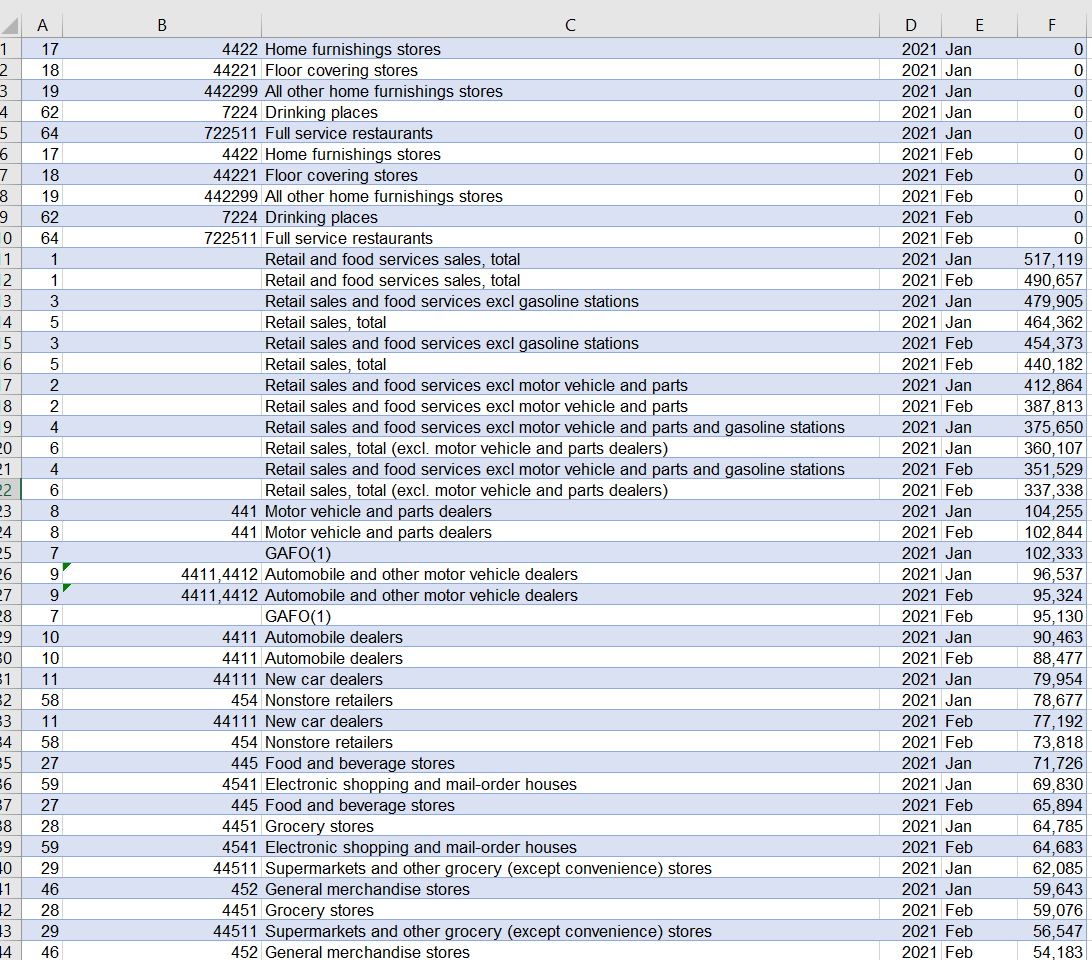

[Back to top](#Index)

### 2.4 Read the Data Using Python

Python can be used to read the data from your excel file. When saving your data as a .csv, you can write a script to read the data in for python to organize your dataset.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

Lets look at a sample and how it works. Assume I want to write in a normal notepad and gather information on the following: name, age, sex, eye color and height (inches).

I could write this information as such and save the file as a .csv file.

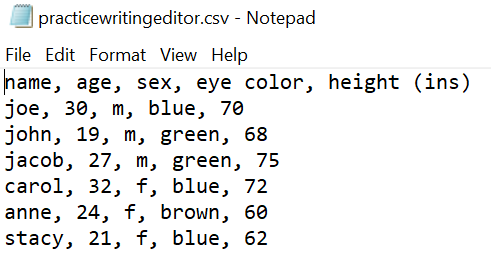
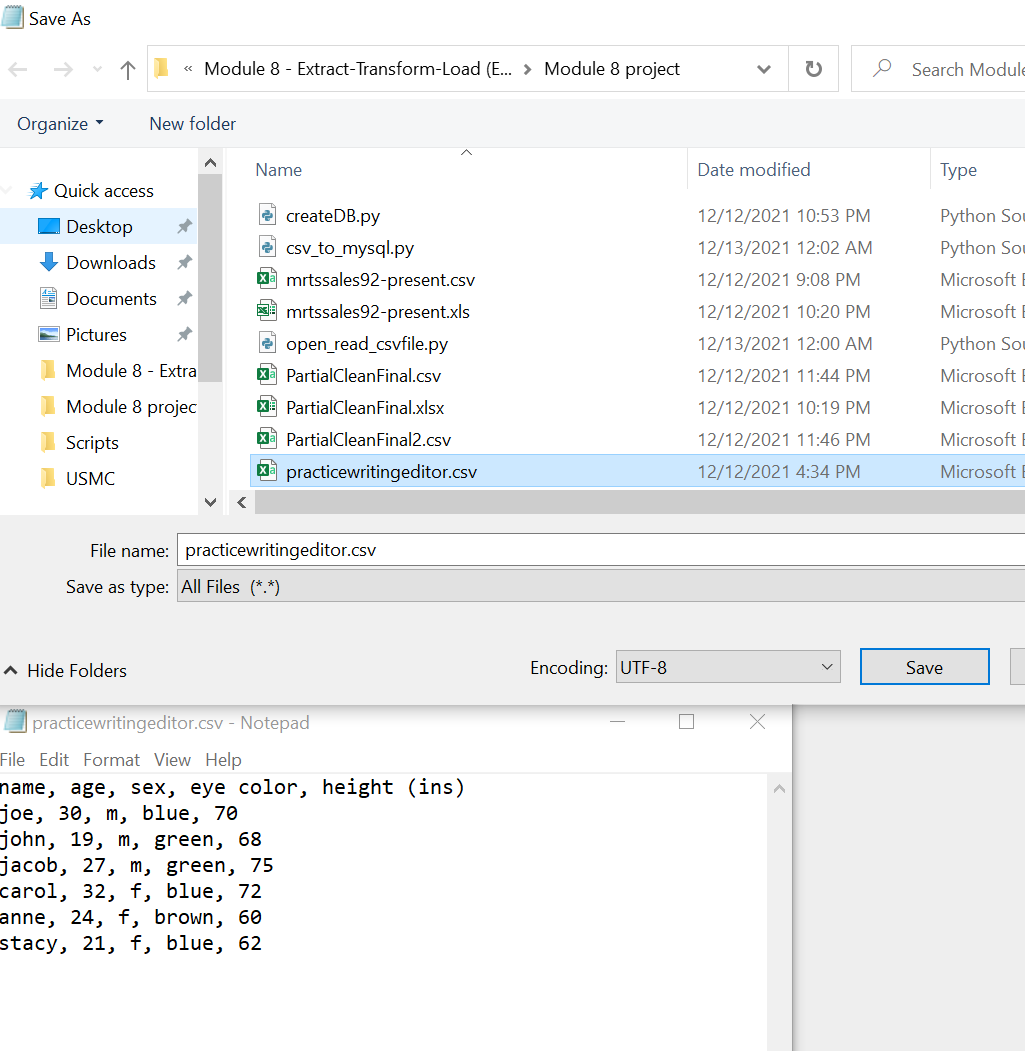

Once I have done that, I can create a python code to populate that data as such. Now I have successfully written information from a normal notepad, into a converted .csv file which can also be opened in excel.

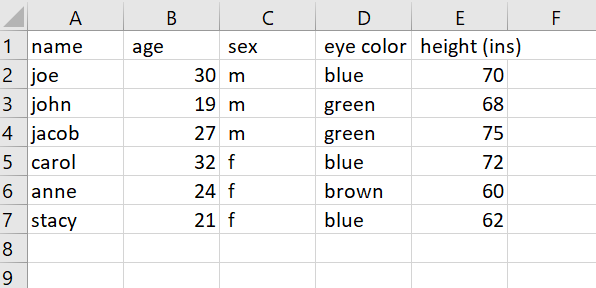

In [19]:
import csv

# open file
with open('practicewritingeditor.csv') as csv_file:

#read csv file
    csv_reader = csv.reader(csv_file)

#loop through data
    for row in csv_reader:
        print(row)

['name', ' age', ' sex', ' eye color', ' height (ins)']
['joe', ' 30', ' m', ' blue', ' 70']
['john', ' 19', ' m', ' green', ' 68']
['jacob', ' 27', ' m', ' green', ' 75']
['carol', ' 32', ' f', ' blue', ' 72']
['anne', ' 24', ' f', ' brown', ' 60']
['stacy', ' 21', ' f', ' blue', ' 62']


[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

To read our data MRTS data, it is done the same way as shown before. But to better prepare for it, we will create a list for our future MySQL script to pull values from. It is done by first importing csv library. This is done with the command **import csv**. We then create a list using a loop to add to the list until all the dataset is present. This will be adding to our database alot more simplistic.

In [1]:
import csv

#if in microsoft excel, save as .csv (Comma Delimited)
with open('PartialCleanFinal3.csv') as csv_file:
    csvfile = csv.reader(csv_file)
    totalvalue = []
    for row in csvfile:
        value = (row[0],row[1],row[2],row[3],row[4],row[5])
        totalvalue.append(value)
        
print(totalvalue)

[('17', '4422', 'Home furnishings stores', '2021', 'Jan', '0'), ('18', '44221', 'Floor covering stores', '2021', 'Jan', '0'), ('19', '442299', 'All other home furnishings stores', '2021', 'Jan', '0'), ('62', '7224', 'Drinking places', '2021', 'Jan', '0'), ('64', '722511', 'Full service restaurants', '2021', 'Jan', '0'), ('17', '4422', 'Home furnishings stores', '2021', 'Feb', '0'), ('18', '44221', 'Floor covering stores', '2021', 'Feb', '0'), ('19', '442299', 'All other home furnishings stores', '2021', 'Feb', '0'), ('62', '7224', 'Drinking places', '2021', 'Feb', '0'), ('64', '722511', 'Full service restaurants', '2021', 'Feb', '0'), ('1', '', 'Retail and food services sales, total', '2021', 'Jan', '517119'), ('1', '', 'Retail and food services sales, total', '2021', 'Feb', '490657'), ('3', '', 'Retail sales and food services excl gasoline stations', '2021', 'Jan', '479905'), ('5', '', 'Retail sales, total', '2021', 'Jan', '464362'), ('3', '', 'Retail sales and food services excl gaso

[Back to top](#Index)

### 2.5 Writing an Installation Script

When writing to the database, first you must ensure another library is imported. This library is **import mysql.connector**. This will give the user the ability to communicate with MySQL using python. After adding information like user, password (password for your local machine), and host are all designated, the use of MySQL commands can be used. 

Creating the database is always the first step, and if it exists, we want to start fresh. The database we will use for this download will be **testmydb**.Once we do that we can create a table with the columns we had choosen before: id, naciscode, description, year, month and total.

Once the database is created and the table is as well, we can then add the final step of execute the command to **INSERT INTO** our table the .csv list we created before labeled **totalvalue**. When we do this, we can check our work and see the output as such.

In [2]:
#import drivers
import mysql.connector

#common info when adding a server to read from
mydb = mysql.connector.connect(
    user='root',
    password='password', #INPUT YOUR PASSWORD FOR YOUR LOCAL MACHINE
    host='localhost',
    auth_plugin='mysql_native_password')

#create database
mycursor = mydb.cursor()

mycursor.execute("DROP DATABASE IF EXISTS testmydb")
mycursor.execute("CREATE DATABASE IF NOT EXISTS testmydb")

mycursor.execute("SHOW DATABASES")
for db in mycursor:
    print(db)
print('')

#create table
mycursor.execute("USE testmydb")
mycursor.execute("CREATE TABLE business (id int NOT NULL,naciscode VARCHAR(30),description VARCHAR(100),year int NOT NULL,month VARCHAR(3),total int NOT NULL)")

mycursor.executemany("INSERT INTO business VALUES(%s,%s,%s,%s,%s,%s)",totalvalue)
mydb.commit()

#check work
mycursor.execute("SHOW COLUMNS IN business")
for cols in mycursor:
    print(cols)

('bad_sakila',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('testmydb',)

('id', b'int', 'NO', '', None, '')
('naciscode', b'varchar(30)', 'YES', '', None, '')
('description', b'varchar(100)', 'YES', '', None, '')
('year', b'int', 'NO', '', None, '')
('month', b'varchar(3)', 'YES', '', None, '')
('total', b'int', 'NO', '', None, '')



[Back to top](#Index)

## 3. Analysis and Visualization

Whether your choosing to perform queries on your data in the Python console or MySQL Workbench, it is very crucial to run tests. Running basic queries to more complex methods will ensure your data has no flaws. This also applies to Visualization. When doing a query with your data and checking a simple graph, like total vs the year, should show data with no sporadic fluxuations. Yes, as data should change and other factors apply, no data should drop off or violently skyrocket. If your data does this, it is best to ensure your steps inputting the data hasn't corrputed during any steps up to now.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

For starters we will look at running some queries in the MySQL workbench. Some basic queries to check your data is the following: make sure you are able to view **all data** within the console, ensure no **nulls** are present in columns with numeric value and finally ensure data doesn't have information that **shouldn't be present**.

When checking all our data, we will also go ahead and order our query to organize our output by **ID**. This will also be an extra check to ensure nothing is out of order.

#### Query 1
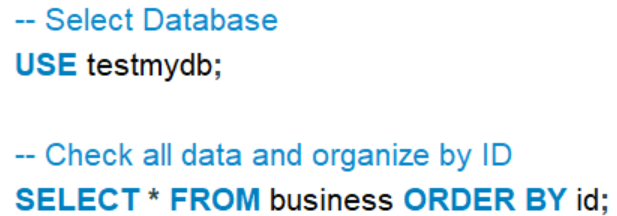

#### Output from Query 1 Organized by ID
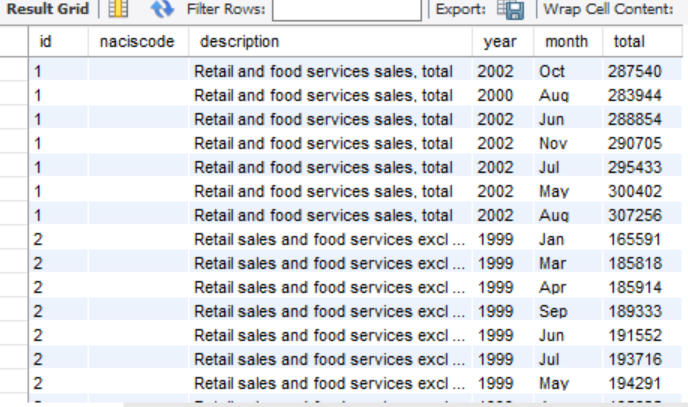

For our next query, we will go and check our **Total** column and see if it contains any nulls. If the data does contain nulls we might have to go back to cleaning our dataset before proceeding on. There is two approaches we can take and will look at both. First, we can check a query with checking the nulls present in the column. Secondly, if we know exactly how many data points are in the total column. We can do the opposite and count all the data points that don't contain null. The answer should be a total of 22,750 non null data points.

#### Query 2 part 1
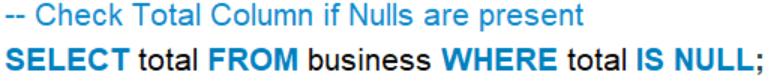

#### Output from Query 2 on Total Column
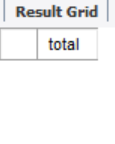

#### Query 2 part 2 (Answer is total of 22750 non null data points)
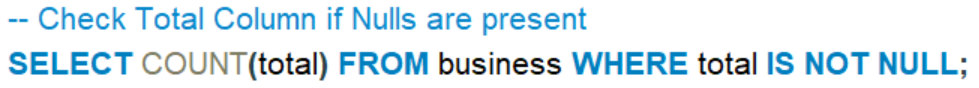

#### Output from Query 2 Counting Non Null Total Column
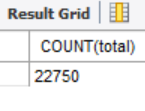

For the example with data that should not be present, we will look at the **Year** as well as the **Month** to ensure nothing stands out. We do this by running the following query and the results show no strange data inputs.

#### Query 3
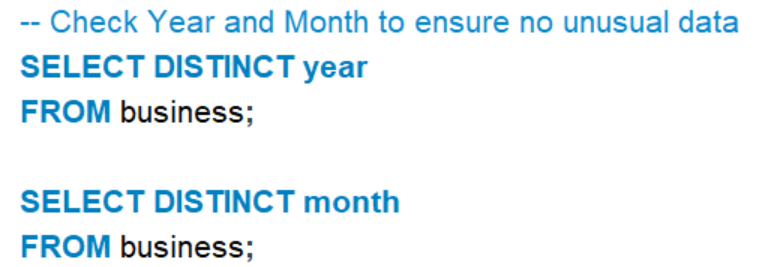

#### Output from Query 3 with Year
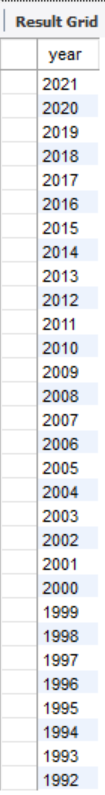

#### Output from Query 3 with Month
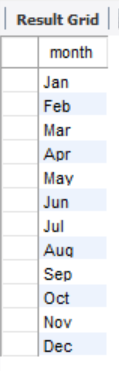

[Back to top](#Index)

### 3.2 Running Queries From Python

When using python to run these code, the outcome should still be the same no matter the circumstances. For each line of code we displayed for the MySQL workbench, you will write it verbatim with minor changes to the python script. Some of the changes include having **"execute"** commands to send to MySQL as well as importing **"print"** to output your results.

In [3]:
#Queries copied over from MySQL into Python
#Query 1
mycursor.execute("SELECT * FROM business ORDER BY id")
for output in mycursor:
    print(output)
    print('') #create spaces between answers

#Query 2
mycursor.execute("SELECT total FROM business WHERE total IS NULL")
for output in mycursor:
    print(output)
    print('') #create spaces between answers

mycursor.execute("SELECT COUNT(total) FROM business WHERE total IS NOT NULL")
for output in mycursor:
    print(output)
    print('') #create spaces between answers

#Query 3
mycursor.execute("SELECT DISTINCT year FROM business")
for output in mycursor:
    print(output)
    print('') #create spaces between answers

mycursor.execute("SELECT DISTINCT month FROM business")
for output in mycursor:
    print(output)
    print('') #create spaces between answers
    
# A lot of data populates, but check the bottom of the list to ensure same values from above are present from
# Queries 2 and 3

(1, '', 'Retail and food services sales, total', 1994, 'Dec', 241111)

(1, '', 'Retail and food services sales, total', 1994, 'Nov', 202520)

(1, '', 'Retail and food services sales, total', 1994, 'Aug', 202388)

(1, '', 'Retail and food services sales, total', 1994, 'Oct', 197956)

(1, '', 'Retail and food services sales, total', 1994, 'Jun', 197946)

(1, '', 'Retail and food services sales, total', 1994, 'May', 194927)

(1, '', 'Retail and food services sales, total', 1994, 'Sep', 193954)

(1, '', 'Retail and food services sales, total', 1994, 'Jul', 193355)

(1, '', 'Retail and food services sales, total', 1994, 'Mar', 192319)

(1, '', 'Retail and food services sales, total', 1994, 'Apr', 189569)

(1, '', 'Retail and food services sales, total', 1994, 'Feb', 162841)

(1, '', 'Retail and food services sales, total', 1994, 'Jan', 161349)

(1, '', 'Retail and food services sales, total', 1993, 'Dec', 224540)

(1, '', 'Retail and food services sales, total', 1993, 'Nov', 187443)

(1, ''

[Back to top](#Index)

### 3.3 Explore Trends

Trends are an important aspect when comparing your data. When looking at data, its easy to parse through it in excel, but what happens when you want to look at data in total. Comparing that total data, whether its versus year or month. Looking at that information but changing the different categories. With python, you can parse that data while loading it to the MySQL workbench. In this section we will look at the Retail and Food Services total sales over the past two decades as well as some specific category data.

Econmic trends are important data points to observe. Looking at these specific trends can lead you to conclusions on how things are doing. The health of the data depends soley on the actions taken by those who physically affect that data. For example, sales for a business may go up or down depending on certain policies at a company or depending on different marketing schemes.

### 3.3.1 Retail and Food Services Trend

Lets look at the Retail and Food Services trend. When looking at the data, it can be seen that data is provided for the total amounts for subject. It lists the total per month for a given year. But we will have to query that data to get the sum total data for each year. We will do this query in python and then create a graph showing the trend of retail/food services versus the year. What shows is through each year, our gross sales total increases, except for a short decline during the year's of 2005 and 2010.

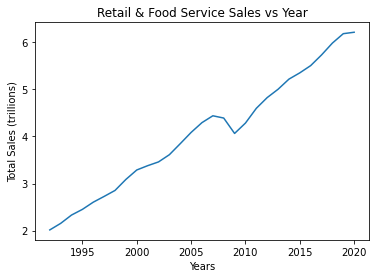

In [4]:
#import drivers
import matplotlib.pyplot as plt

#GRAPHING DATA
#Trends of retail total sales vs year
query = ('''
SELECT (sum(total)/1000/1000) AS total, year
FROM business
WHERE description = 'Retail and food services sales, total' AND year != 2021
GROUP BY year; 
''')

mycursor.execute(query)

year = []
total = []

for row in mycursor.fetchall():
    #print(row)
    total.append(row[0])
    year.append(row[1])

plt.plot(year,total)
plt.xlabel('Years')
plt.ylabel('Total Sales (trillions)')
plt.title('Retail & Food Service Sales vs Year')
plt.show()

### 3.3.2 Book / Sports / Hobby store Trends

Lets now look at something with more complexity. Lets compare three different stores. Lets observe the book stores, sporting goods stores, and the hobby/toy stores. We will gather the total sales data over the years and compare the trend lines.

What we get is the graph below showing total sales (in billions) vs the year for each store. What we see in the beginning is the sporting goods store with the highest slope of all three in the trends. With sporting goods having such a higher slope, means the trendline had the faster growth of the three. You can see during the COVID-19 pandemic in 2020, the sales of sporting goods stores spiked dramatically and book stores took a dive. This data lies true when looking at many articles posted during that time of the supply shortages (Article in VOX with the title "Why it’s so hard to find dumbbells in the US"). As for hobby/toy stores, sales from 2000 on stayed relatively with a slight dip right before 2020.


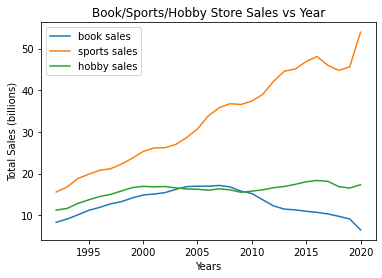

In [5]:
#Creation of query
query = ('''
SELECT (sum(total)/1000) AS total, year
FROM business
WHERE description = 'Book stores' AND year != 2021
GROUP BY year; 
''')

mycursor.execute(query)

year = []
booktotal = []

for row in mycursor.fetchall():
    #print(row)
    booktotal.append(row[0])
    year.append(row[1])

query = ('''
SELECT (sum(total)/1000) AS total, year
FROM business
WHERE description = 'Sporting goods stores' AND year != 2021
GROUP BY year; 
''')

mycursor.execute(query)

sporttotal = []

for row in mycursor.fetchall():
    #print(row)
    sporttotal.append(row[0])

query = ('''
SELECT (sum(total)/1000) AS total, year
FROM business
WHERE description = 'Hobby, toy, and game stores' AND year != 2021
GROUP BY year; 
''')

mycursor.execute(query)

hobbytotal = []

for row in mycursor.fetchall():
    #print(row)
    hobbytotal.append(row[0])

plt.plot(year,booktotal, label = 'book sales')
plt.plot(year,sporttotal, label = 'sports sales')
plt.plot(year,hobbytotal, label = 'hobby sales')
plt.xlabel('Years')
plt.ylabel('Total Sales (billions)')
plt.title('Book/Sports/Hobby Store Sales vs Year')
plt.legend(loc='upper left')
plt.show()

[Back to top](#Index)

### 3.4 Explore Percentage Change

In economics, percentage change is the change a variable has undergone fromm the previous value. For example, your first previous value was 10 and the new value is 15 over 12 months. The percentage change over that 12 months period was 50%, from 10 to 15.



### 3.4.1 Men & Womens Clothing Percentage Change

Lets compare the percentage change of Men and Women's Clothing. These relate mainly due to the fact that it is clothing! But how has the prices change for both of them over time. Lets first look at the graph of price difference other the years. One of the biggest things we notice as before, is during 2020, both total sales drop off. Another thing to keep in mind is total sales for men clothing is average pretty much all through both decades, where as women clothing total sales show a positive slope. This occurs during the years of 1995 to 2010.

Knowing that information now, we can tell the percentage change will have very little affect. Assuming very little change and average numbers through the decades, we can assume percentage change will fluctuate between 0-10% each year. When we graph that change below, we can see intrestingly enough, that is exactly how both behave. 
- Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?

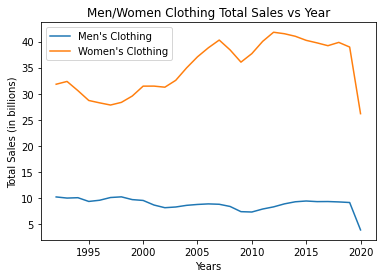

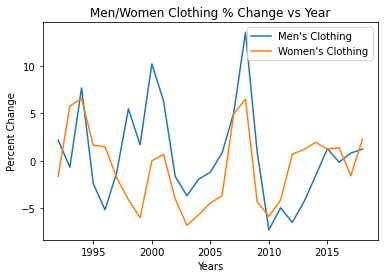

In [6]:
#Creation of Query
query = ('''
SELECT (sum(total)/1000) AS total, year
FROM business
WHERE description = "Men's clothing stores" AND year != 2021
GROUP BY year; 
''')

mycursor.execute(query)

year = []
mentotal = []

for row in mycursor.fetchall():
    #print(row)
    mentotal.append(row[0])
    year.append(row[1])

query = ('''
SELECT (sum(total)/1000) AS total, year
FROM business
WHERE description = "Women's clothing stores" AND year != 2021
GROUP BY year; 
''')

mycursor.execute(query)

womentotal = []

for row in mycursor.fetchall():
    #print(row)
    womentotal.append(row[0])


plt.plot(year,mentotal, label = "Men's Clothing")
plt.plot(year,womentotal, label = "Women's Clothing")
plt.xlabel('Years')
plt.ylabel('Total Sales (in billions)')
plt.title('Men/Women Clothing Total Sales vs Year')
plt.legend(loc='upper left')
plt.show()
plt.close()

#Calculate Percent Change for each
import numpy as np
mencentchg = np.array(mentotal,dtype=float)
womencentchg = np.array(womentotal,dtype=float)

mencentchg = np.diff(mencentchg) / mencentchg[:-1] * 100.
womencentchg = np.diff(womencentchg) / womencentchg[:-1] * 100.

mencentchg = mencentchg.tolist()
womencentchg = womencentchg.tolist()

#reshape data
year.pop(0)
year.pop(0)
mencentchg.pop(0)
womencentchg.pop(0)


plt.plot(year,mencentchg, label = "Men's Clothing")
plt.plot(year,womencentchg, label = "Women's Clothing")
plt.xlabel('Years')
plt.ylabel('Percent Change')
plt.title('Men/Women Clothing % Change vs Year')
plt.legend(loc='upper right')
plt.show()

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

When it comes to rolling time windows, it can become an advantage to computate. When looking at the rolling window, its the ability to collect data at a fixed point in time. But when that position in time moves, you might want to collect that same amount of data points. For example, lets say you always want the average of the last 20 data points already populated no matter where you are at. Well with rolling time windows you can do just that in python. This is helpful when you want to see how a particular business is doing. When seeing how the average is doing, over a fixed amount of time, it can help with seeing growth.

In this session we will look at both the Shoe Stores and Jewelry Stores. When we graph both with there total sales vs year we get a very messy graph. In that graph you can see massive data spikes. At glance this data is useless. But with doing a rolling average on our data for both stores. We can see a much more clear picture. For this example we will look at all data points (this includes year and month) for the last two decades. For the average, we will look at the last 12 months. When we look at the trend, we can see steady growth in both businesses. The 12 month average growth increases with each month. From a business point, this is very positive to see!

<AxesSubplot:xlabel='year'>

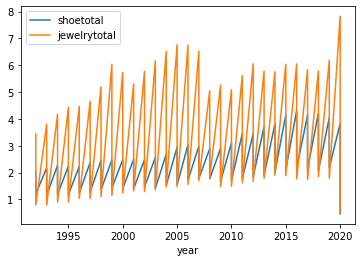

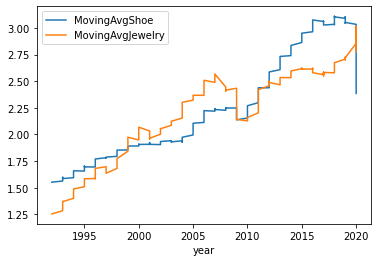

In [34]:
#Creation of Query
query = ('''
SELECT (total/1000), month, year
FROM business
WHERE description = 'Shoe stores' AND year != 2021
Order by year;
''')

mycursor.execute(query)

year = []
month = []
shoetotal = []

for row in mycursor.fetchall():
    #print(row)
    shoetotal.append(row[0])
    month.append(row[1])
    year.append(row[2])
    
query = ('''
SELECT (total/1000), month, year
FROM business
WHERE description = 'Jewelry stores' AND year != 2021
Order by year;
''')

mycursor.execute(query)

jewelrytotal = []

for row in mycursor.fetchall():
    #print(row)
    jewelrytotal.append(row[0])
   
    
#close MySQL Shell
mycursor.close()
mydb.close()

#create a dataframe
import pandas as pd
df = pd.DataFrame({'shoetotal':shoetotal, 'jewelrytotal':jewelrytotal, 'month':month, 'year':year})
df['shoetotal']=df['shoetotal'].astype(float)
df['jewelrytotal']=df['jewelrytotal'].astype(float)

#check graph
df.plot.line(x='year', y=['shoetotal','jewelrytotal'])

#moving average 
df['MovingAvgShoe'] = df['shoetotal'].rolling(window=12).mean()
df['MovingAvgJewelry'] = df['jewelrytotal'].rolling(window=12).mean()

df.head()

#check moving average plot
df.plot.line(x='year', y=['MovingAvgShoe','MovingAvgJewelry'])


[Back to top](#Index)

## Conclusion

We have been able to take our data from a single excel file, and transform it in multiple stories. This was done with cleaning our data in the beginning stages and moving it to MySQL to be queried on. During that phase, data as able to be written with command lines through python to output trends, percent changes and rolling averages. We were able to see how the COVID-19 pandemic affected businesses, both in a negative way with the book sales and positive way with sporting goods sales.  These phases showed exactly how powerful the ETL process can be. 


[Back to top](#Index
)
## References

Abad-Santos, Alex. “Why It's so Hard to Find Dumbbells in the US&nbsp;.” Vox, Vox, 24 Aug. 2020, https://www.vox.com/the-       goods/21396116/dumbbell-set-shortage-nordictrack-bowflex. 

datagy. “Moving Average (Rolling Average) in Pandas and ... - Youtube.” Youtube, https://www.youtube.com/watch?v=FYji
    5S8D2s. 
    
Dr Sanchez, Abel. “Module 8 - ETL.” Emeritus, https://student.emeritus.org/courses/3799/pages/module-8-overview
    introduction-and-information-05-00?module_item_id=850478. 
    
techlessons. “Percent Change Method Explanation in Pandas for Python: .pct_change() and All Parameters - Youtube.” YouTube,     YouTube, https://www.youtube.com/?app=desktop. 